In [20]:
import os
import zipfile

# Extract zip files
def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Example: Extract both datasets
good_use_path = "crypto_good_use.zip"
misuse_path = "crypto_misuse.zip"
extract_path = "crypto_dataset"

extract_zip(good_use_path, os.path.join(extract_path, "good"))
extract_zip(misuse_path, os.path.join(extract_path, "misuse"))

print("Datasets extracted successfully!")


Datasets extracted successfully!


In [22]:
import javalang

# Function to parse Java files and extract method calls
def parse_java_files(directory):
    data = []
    labels = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".java"):
                file_path = os.path.join(root, file)
                with open(file_path, 'r') as f:
                    try:
                        tree = javalang.parse.parse(f.read())
                        method_calls = extract_method_calls(tree)
                        category = os.path.basename(root)  # Use folder name as category
                        data.append(" ".join(method_calls))  # Feature as concatenated method calls
                        labels.append(category)  # Label based on folder name
                    except Exception as e:
                        print(f"Error parsing {file_path}: {e}")
    return data, labels

# Extract method calls from AST
def extract_method_calls(tree):
    method_calls = []
    for path, node in tree:
        if isinstance(node, javalang.tree.MethodInvocation):
            method_calls.append(node.member)
    return method_calls

# Parse both datasets
good_use_data, good_use_labels = parse_java_files(os.path.join(extract_path, "good"))
misuse_data, misuse_labels = parse_java_files(os.path.join(extract_path, "misuse"))

# Combine data
data = good_use_data + misuse_data
labels = ["good"] * len(good_use_data) + ["misuse"] * len(misuse_data)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert method calls into feature vectors
vectorizer = CountVectorizer()
feature_matrix = vectorizer.fit_transform(data).toarray()

print(f"Feature matrix shape: {feature_matrix.shape}")


Feature matrix shape: (386, 131)


In [34]:
# Display all feature names (columns of the matrix)
feature_names = vectorizer.get_feature_names_out()
print("Feature Names:")
print(feature_names)

Feature Names:
['add' 'addcertpathchecker' 'addcertstore' 'addextension' 'addprovider'
 'allocate' 'areequal' 'array' 'aslist' 'attack' 'attackersha1' 'b2i'
 'b2s' 'b2x' 'build' 'buildendcert' 'buildmiddlecert'
 'buildselfsignedcert' 'checkerror' 'checkvalidity' 'clone' 'close'
 'concatenate' 'constanttimeareequal' 'contains' 'copyofrange' 'create'
 'createauthoritykeyidentifier' 'createsocket'
 'createsubjectkeyidentifier' 'currenttimemillis' 'digest' 'dofinal'
 'dophase' 'ehigualconst' 'ehigualvar' 'equals' 'exit' 'fill' 'flush'
 'generatecertpath' 'generatekey' 'generatekeypair' 'generateparameters'
 'generatepublic' 'generatesecret' 'generateseed' 'genrsakeypair'
 'getalgorithm' 'getblocksize' 'getbytes' 'getcertificate'
 'getcertificatelist' 'getciphersuite' 'getclass' 'getcrl' 'getdefault'
 'getdigestlength' 'getencoded' 'getinputstream' 'getinstance'
 'getinstancestrong' 'getissuerx500principal' 'getiv' 'getmaclength'
 'getname' 'getoutputstream' 'getparameterspec' 'getpeercerti

In [46]:
import pandas as pd

# Ensure all columns and rows are displayed
pd.set_option('display.max_rows', 400)  # Adjust as needed
pd.set_option('display.max_columns', 150)  # Adjust as needed

# Display the DataFrame
print(df)


   aes  cipher  des  dofinal  final  generatekey  getinstance  init  \
0    1       1    0        1      0            0            1     1   
1    0       0    0        1      0            1            0     1   
2    0       1    0        0      1            0            0     1   
3    1       1    1        0      0            0            1     1   

   secretkeyspec  update  
0              0       0  
1              1       0  
2              0       1  
3              0       0  


In [48]:
# Check for columns with all zeros
all_zero_columns = (df == 0).all(axis=0)

# Print columns that are entirely zero
print("Columns with all zeros:")
print(all_zero_columns[all_zero_columns].index.tolist())


Columns with all zeros:
[]


In [50]:
# Reinitialize the DataFrame with all feature names
df = pd.DataFrame(feature_matrix, columns=feature_names)

# Display the full DataFrame
print(df)


     add  addcertpathchecker  addcertstore  addextension  addprovider  \
0      0                   0             0             0            0   
1      0                   0             0             0            0   
2      0                   0             0             0            0   
3      0                   0             0             0            0   
4      0                   0             0             0            0   
5      0                   0             0             0            0   
6      0                   0             0             0            0   
7      0                   0             0             0            0   
8      0                   0             0             0            2   
9      0                   0             0             0            1   
10     0                   0             0             0            1   
11     0                   0             0             0            1   
12     0                   0             0         

In [52]:
# Save the full feature matrix to a CSV file
df.to_csv("feature_matrix_full.csv", index=False)

print("Feature matrix saved to feature_matrix_full.csv")


Feature matrix saved to feature_matrix_full.csv


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, labels, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[35 13]
 [ 4 26]]

Classification Report:
              precision    recall  f1-score   support

        good       0.90      0.73      0.80        48
      misuse       0.67      0.87      0.75        30

    accuracy                           0.78        78
   macro avg       0.78      0.80      0.78        78
weighted avg       0.81      0.78      0.78        78



In [56]:
from sklearn.metrics import classification_report, accuracy_score

# Predict the test set
y_pred = classifier.predict(X_test)

# Classification report (includes precision, recall, F1-score for each category)
report = classification_report(y_test, y_pred, target_names=['good', 'misuse'], output_dict=True)

# Accuracy
overall_accuracy = accuracy_score(y_test, y_pred)

# Print metrics for each category
print(f"Overall Accuracy: {overall_accuracy:.2f}\n")

for category, metrics in report.items():
    if category in ['good', 'misuse']:  # Skip overall averages for now
        print(f"Category: {category}")
        print(f"  Precision: {metrics['precision']:.2f}")
        print(f"  Recall:    {metrics['recall']:.2f}")
        print(f"  F1-Score:  {metrics['f1-score']:.2f}")
        print(f"  Support:   {metrics['support']}")
        print()


Overall Accuracy: 0.78

Category: good
  Precision: 0.90
  Recall:    0.73
  F1-Score:  0.80
  Support:   48.0

Category: misuse
  Precision: 0.67
  Recall:    0.87
  F1-Score:  0.75
  Support:   30.0



In [58]:
# Get predicted probabilities for the positive class (misuse)
y_prob = classifier.predict_proba(X_test)[:, 1]  # Probabilities for the positive class


In [60]:
from sklearn.metrics import roc_curve, auc

# Binarize the labels (assuming binary classification)
y_test_binary = [1 if label == "misuse" else 0 for label in y_test]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary, y_prob)
roc_auc = auc(fpr, tpr)


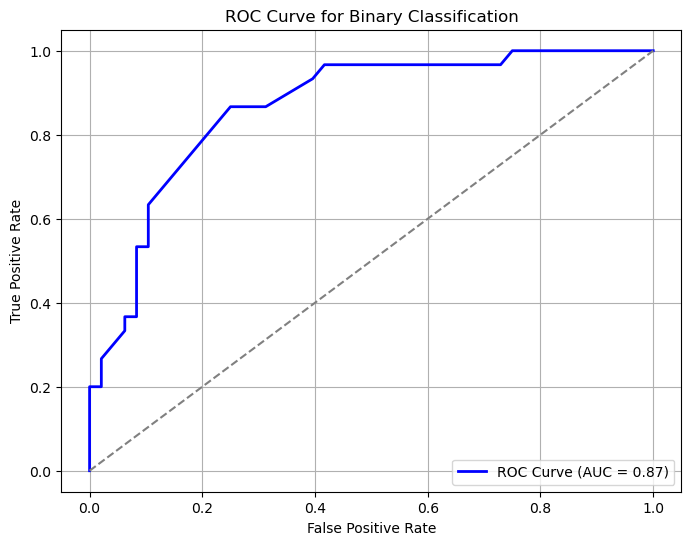

In [62]:
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Binary Classification")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [64]:
                                                                      from graphviz import Digraph

# Create a directed graph
dot = Digraph(format="png", graph_attr={"rankdir": "LR"})

# Add nodes
dot.node("A", "Dataset Preparation")
dot.node("B", "Feature Extraction")
dot.node("C1", "Per-Category Models\n(Random Forest)")
dot.node("C2", "Full Model\n(Random Forest)")
dot.node("D", "Evaluation")
dot.node("E", "Metrics and Visualizations")

# Add edges
dot.edge("A", "B", label="AST Parsing & BoW")
dot.edge("B", "C1", label="Per-Category")
dot.edge("B", "C2", label="Full Dataset")
dot.edge("C1", "D", label="Per-Category Metrics")
dot.edge("C2", "D", label="Full Model Metrics")
dot.edge("D", "E", label="Confusion Matrix, ROC, AUC")

# Save and render the graph
dot.render("process_flow", format="png", cleanup=True)

print("Process diagram saved as 'process_flow.png")                                     

Process diagram saved as 'process_flow.png


In [101]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.
